In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns 
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,r2_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier


In [68]:
data=pd.read_csv('vgsales.csv')

In [69]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [72]:
round(((data.isnull().sum()/len(data))*100).sort_values(ascending=False), 2)

Year            1.63
Publisher       0.35
Rank            0.00
Platform        0.00
Name            0.00
Genre           0.00
NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.00
dtype: float64

Text(0.5, 1.0, 'Missing Values')

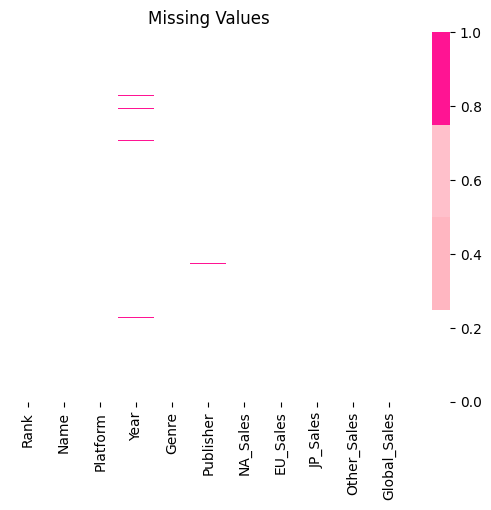

In [73]:
custom_cmap = ListedColormap(['white', 'lightpink', 'pink', 'deeppink'])
sns.heatmap(data.isnull(), yticklabels=False, cmap=custom_cmap,cbar=True)
plt.title('Missing Values')

In [74]:
#Handle missing values 
data['Publisher'].describe()

count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

In [75]:
data['Publisher']=data['Publisher'].fillna(data['Publisher'].mode()[0])

In [76]:
data['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [77]:
data['Year']=data['Year'].fillna(data['Year'].median())

In [78]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [79]:
#Outliers
data.select_dtypes(include=['number'])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01


In [85]:
# Filter outliers from data
#Calculate Q1 and Q3
numeric_col=['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

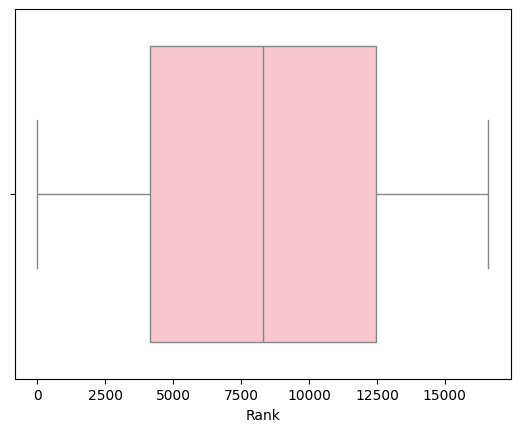

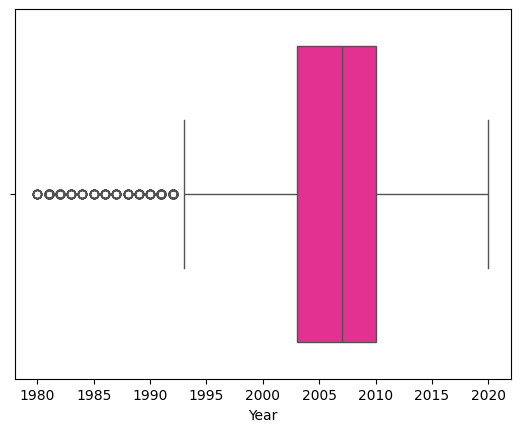

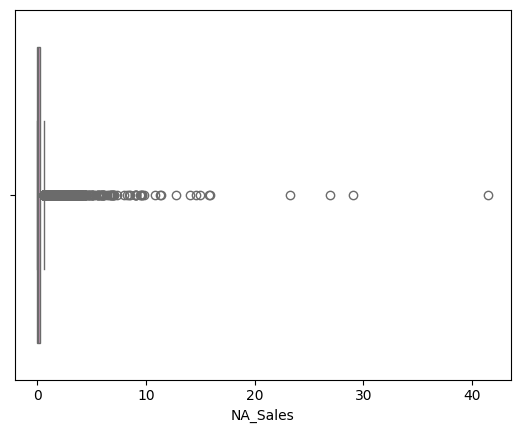

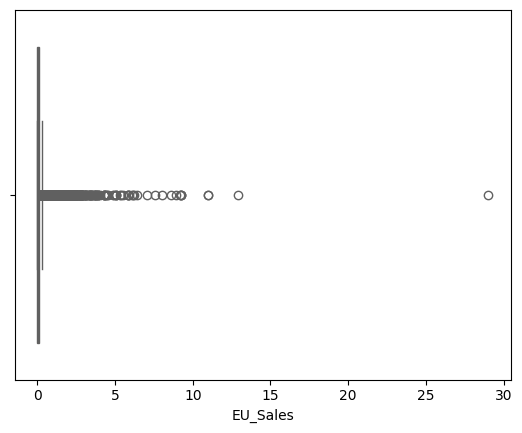

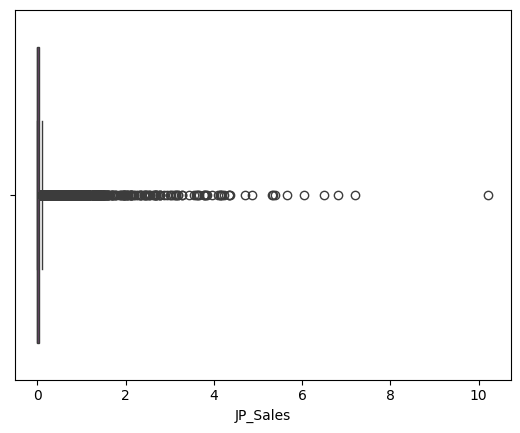

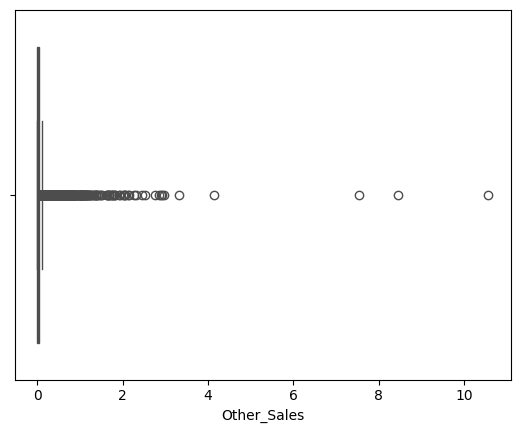

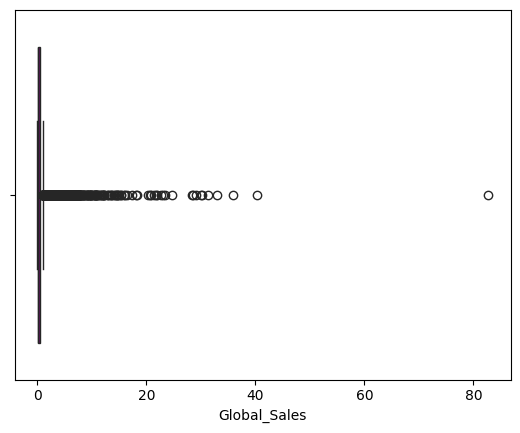

In [ ]:

sns.boxplot(x=data['Rank'],color="pink")
plt.show()
sns.boxplot(x=data['Year'],color="deeppink")
plt.show()
sns.boxplot(x=data['NA_Sales'],color="#d393be")
plt.show()
sns.boxplot(x=data['EU_Sales'],color="#e49d5c")
plt.show()
sns.boxplot(x=data['JP_Sales'],color="#8b3e8b")
plt.show()
sns.boxplot(x=data['Other_Sales'],color="red")
plt.show()
sns.boxplot(x=data['Global_Sales'],color="purple")
plt.show()